In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set_style('whitegrid')
import numpy
import tempfile
import pygraphviz
import matplotlib

from pomegranate import *

numpy.random.seed(0)
numpy.set_printoptions(suppress=True)

%load_ext watermark
%watermark -m -n -p numpy,scipy,pomegranate

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
numpy      : 1.23.5
scipy      : 1.10.0
pomegranate: 0.14.4

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 165 Stepping 2, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [3]:
burglary = DiscreteDistribution({'T': 0.001, 'F': 0.999})

In [4]:
earthquake = DiscreteDistribution({'T': 0.002, 'F': 0.998})

In [5]:
# Conditional distribution for the alarm devices
alarm = ConditionalProbabilityTable(
        [[ 'T', 'T', 'T', 0.95 ],
         [ 'T', 'T', 'F', 0.94 ],
         [ 'T', 'F', 'T', 0.29 ],
         [ 'T', 'F', 'F', 0.001 ],
         [ 'F', 'T', 'T', 0.0 ],
         [ 'F', 'T', 'F', 0.0 ],
         [ 'F', 'F', 'T', 0.0 ],
         [ 'F', 'F', 'F', 0.0 ]], [burglary, earthquake]) 

In [6]:
# Conditional distribution for john to call
john = ConditionalProbabilityTable(
        [[ 'T','T', 0.9 ],
         [ 'T','F', 0.5 ],
         [ 'F','T', 0.0 ],
         [ 'F','F', 0.0 ]], [alarm]) 

In [7]:
# Conditional distribution for mary to call
mary = ConditionalProbabilityTable(
        [[ 'T','T', 0.7 ],
         [ 'T','F', 0.01 ],
         [ 'F','T', 0.0 ],
         [ 'F','F', 0.0 ]], [alarm]) 

In [8]:
b = State(burglary, name="Burglary")
e = State(earthquake, name="Earthquake")
a = State(alarm, name="Alarm")
j = State(john, name="John Calls")
m = State(mary, name="Mary Calls")

In [9]:
def plot(model, filename=None):
        """Draw this model's graph using pygraphviz.
        Returns
        -------
        None
        """

        if pygraphviz is not None:
            G = pygraphviz.AGraph(directed=True)

            for state in model.states:
                G.add_node(state.name, color='red')

            for parent, child in model.edges:
                G.add_edge(parent.name, child.name)

            if filename is None:
                with tempfile.NamedTemporaryFile(mode='w+b') as tf: # w+b is default mode already, just to make sure
                    G.draw(tf, format='png', prog='dot')
                    img = matplotlib.image.imread(tf)
                    plt.imshow(img)
                    plt.axis('off')
            else:
                G.draw(filename, format='pdf', prog='dot')

        else:
            raise ValueError("must have matplotlib and pygraphviz installed for visualization")

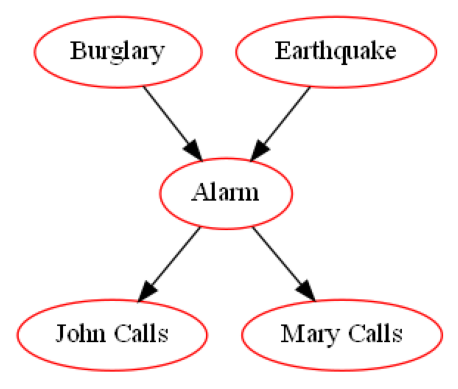

In [10]:
# Create the Bayesian network object
model = BayesianNetwork("Exercise 2: Alarm test")

# Add the states to the network 
model.add_states(b,e,a,j,m)

# Connect the states
model.add_edge(b,a)
model.add_edge(e,a)
model.add_edge(a,j)
model.add_edge(a,m)

# # Integrate everything
model.bake()

# #Draw the network
plot(model)